In [3]:
import pandas as pd

df = pd.read_csv('loan_data.csv')

print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         U

Shape of dataset: (367, 12)

Columns:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

First 5 rows:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             234

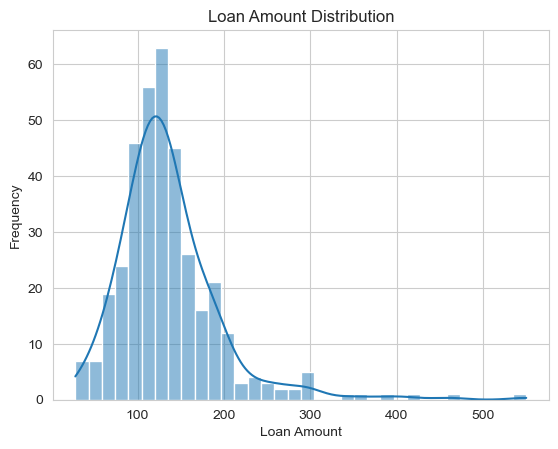

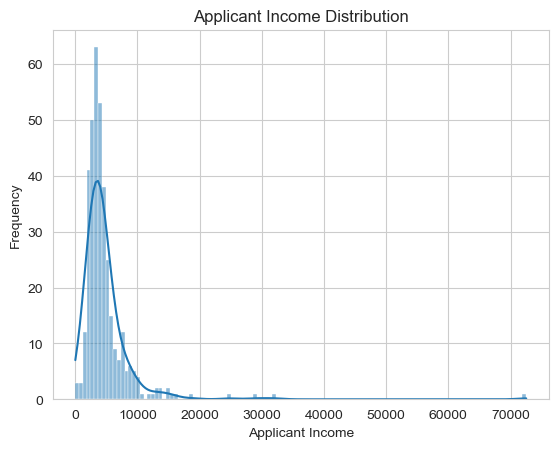

ValueError: Could not interpret value `Loan_Status` for `hue`. An entry with this name does not appear in `data`.

<Figure size 640x480 with 0 Axes>

In [3]:

# Credit Risk Prediction

#  Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Dataset

df = pd.read_csv("loan_data.csv")

print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())

# Handle Missing Values

# Numerical columns → fill with median
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome']
for col in num_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

# Categorical columns → fill with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#  Exploratory Data Analysis (EDA)

# Loan Amount Distribution
plt.figure()
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Applicant Income Distribution
plt.figure()
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

# Education vs Loan Status
plt.figure()
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()

# Encode Categorical Variables

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

#  Define Features and Target

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Split Dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#  Train Logistic Regression Model

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

# Train Decision Tree Model

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

#  Model Evaluation

# Logistic Regression Results
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
print("\nLogistic Regression Confusion Matrix:\n", cm_log)

plt.figure()
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree Results
print("\nDecision Tree Accuracy:",
      accuracy_score(y_test, y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree)
print("\nDecision Tree Confusion Matrix:\n", cm_tree)

plt.figure()
sns.heatmap(cm_tree, annot=True, fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()